# 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0., 10., size=100)

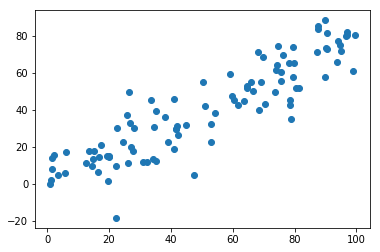

In [3]:
plt.scatter(X[:, 0], X[:, 1])

## demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

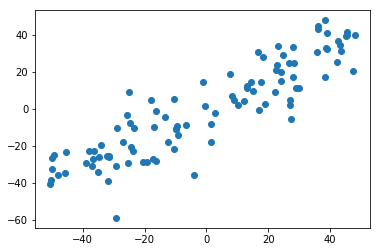

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

In [7]:
np.mean(X_demean[:, 0])

-9.805489753489382e-15

In [8]:
np.mean(X_demean[:, 1])

3.268496584496461e-15

## 梯度上升法

In [9]:
def f(w, X):
    return np.sum(X.dot(w) ** 2.) / len(X)

In [10]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [11]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [12]:
def direction(w):
    return w / np.linalg.norm(w)

In [13]:
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = direction(w + eta * gradient) # 注意1: 每次求一个单位向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
            
        cur_iter += 1

    return w

In [14]:
initial_w = np.random.random(X.shape[1]) # 注意2: 不能初始化为0向量
initial_w

array([0.04994251, 0.95075149])

In [15]:
eta = 0.001

In [16]:
# 注意3: 不能使用 StandardScaler 标准化数据

In [17]:
gradient_ascent(df_debug, X, initial_w, eta)

array([0.78287257, 0.62218208])

In [18]:
gradient_ascent(df_math, X, initial_w, eta)

array([0.78287257, 0.62218208])

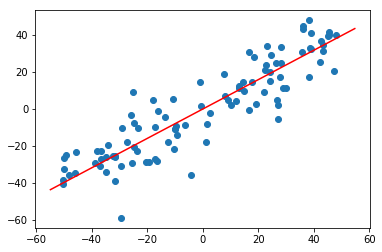

In [19]:
w = gradient_ascent(df_math, X, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([-w[0] * 70, w[0] * 70], [-w[1] * 70, w[1] * 70], color='r')

In [20]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

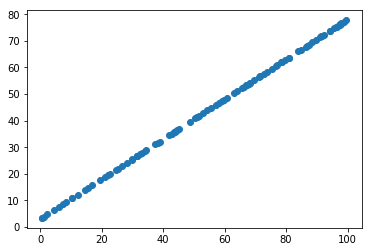

In [21]:
plt.scatter(X2[:, 0], X2[:, 1])

In [22]:
X2_demean = demean(X2)

In [23]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

In [24]:
w2

array([0.79999962, 0.6000005 ])

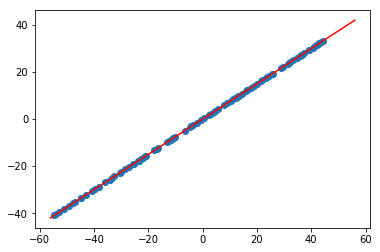

In [25]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([-w2[0] * 70, w2[0] * 70], [-w2[1] * 70, w2[1] * 70], color='r')